In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [5]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [4]:
train.shape, test.shape

((31647, 18), (13564, 17))

In [8]:
default_df = train[train['default'] == "yes"]

In [15]:
single_df = default_df[default_df['marital'] == "single"]

In [19]:
df = single_df[single_df['job'] == "unemployed"]

In [22]:
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
9634,18002,44,unemployed,single,primary,yes,-4,no,yes,cellular,30,jul,788,2,-1,0,unknown,yes
16320,2280,28,unemployed,single,secondary,yes,-353,yes,no,unknown,12,may,89,3,-1,0,unknown,no
21277,25551,35,unemployed,single,secondary,yes,-126,no,no,cellular,19,nov,168,1,-1,0,unknown,no
21492,30841,35,unemployed,single,primary,yes,-84,no,no,cellular,9,feb,19,11,-1,0,unknown,no
26444,6580,30,unemployed,single,secondary,yes,-770,yes,no,unknown,28,may,87,1,-1,0,unknown,no


In [6]:
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [7]:
train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [8]:
train["subscribed"].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

In [9]:
train["subscribed"].value_counts(normalize=True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

<AxesSubplot:>

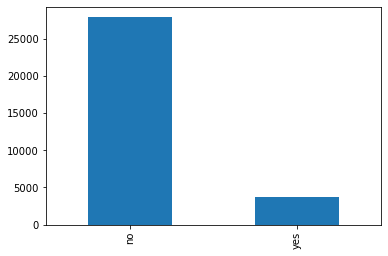

In [10]:
train["subscribed"].value_counts().plot.bar()

C:\Users\Mihir Gujarathi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

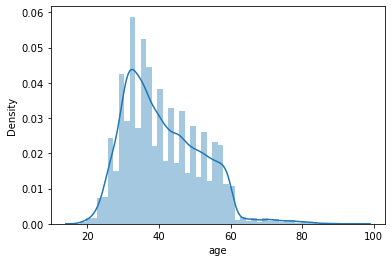

In [11]:
sn.distplot(train["age"])

<AxesSubplot:>

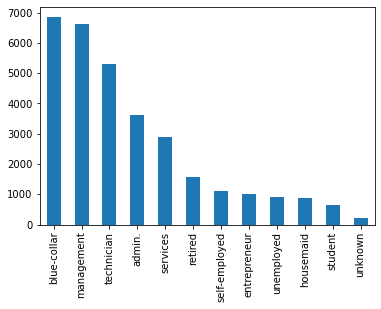

In [12]:
train["job"].value_counts().plot.bar()

<AxesSubplot:>

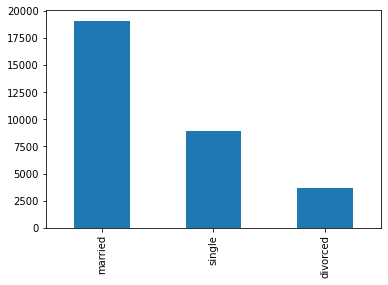

In [13]:
train["marital"].value_counts().plot.bar()

<AxesSubplot:>

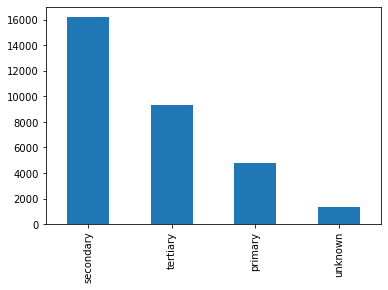

In [14]:
train["education"].value_counts().plot.bar()

<AxesSubplot:>

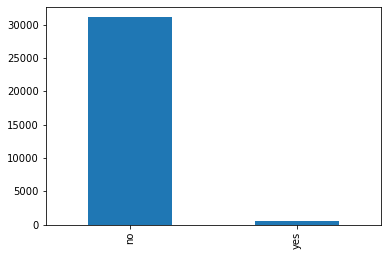

In [15]:
train["default"].value_counts().plot.bar()

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


Text(0, 0.5, 'Percentage')

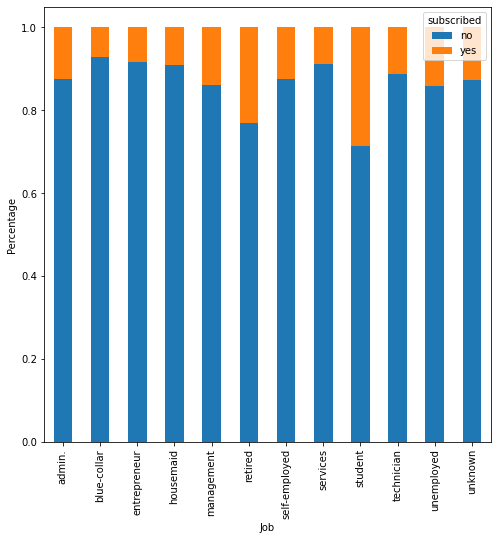

In [16]:
print(pd.crosstab(train['job'],train['subscribed']))

job=pd.crosstab(train['job'],train['subscribed'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('Job')
plt.ylabel('Percentage')

In [17]:
train['subscribed'].replace('no', 0,inplace=True)
train['subscribed'].replace('yes', 1,inplace=True)

<AxesSubplot:>

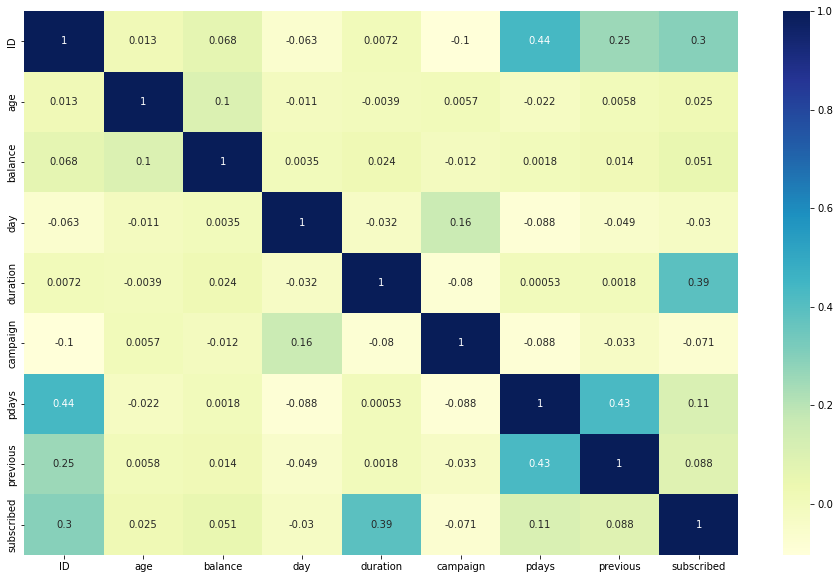

In [18]:
cor = train.corr()
plt.figure(figsize=(16,10))
sn.heatmap(cor, annot=True, cmap="YlGnBu")

In [19]:
target = train["subscribed"]
train = train.drop("subscribed", axis=1)

In [20]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=12)

In [22]:
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression()

In [23]:
lreg.fit(x_train, y_train)

C:\Users\Mihir Gujarathi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
lreg_pred = lreg.predict(x_val)

In [25]:
from sklearn.metrics import accuracy_score

accuracy_score(y_val, lreg_pred)

0.8870458135860979

In [26]:
from sklearn.tree import DecisionTreeClassifier

dtr = DecisionTreeClassifier(max_depth=4)

In [27]:
dtr.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [28]:
dtr_pred = dtr.predict(x_val)

In [29]:
accuracy_score(y_val, dtr_pred)

0.9042654028436019

In [30]:
test_pred = dtr.predict(test)

In [31]:
submission = pd.DataFrame()

In [32]:
submission["ID"] = test["ID"]
submission["subscribd"] = test_pred

In [33]:
submission.to_csv("answer.csv", header=True, index=False)